### CLASSIFYING FEATURES

The idea to classify the features comes from the below mentioned paper     
Suresh, A., & Jha, M. (2018). Automated essay grading using natural language processing and support vector machine. International Journal of Computing and Technology, 5(2), 18-21.

In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('features.csv')

In [3]:
data

,essay_id,essay,domain1_score,word_count,sent_count,avg_word_len,lemma_count,spell_err_count,noun_count,adj_count,verb_count,adv_count,neg_score,pos_score,nue_score,similarity
0,11827,"In this memoir of Narciso Rodriguez, @PERSON3'...",2,133,8,4.383459,81,0.067669,0.255639,0.030075,0.218045,0.022556,0.000,0.153,0.847,0.102273
1,11828,Throughout the excerpt from Home the Blueprint...,2,168,7,4.285714,102,0.011905,0.220238,0.083333,0.184524,0.071429,0.009,0.189,0.802,0.098348
2,11829,The mood the author created in the memoir is l...,3,112,6,4.580357,75,0.080357,0.321429,0.080357,0.169643,0.035714,0.000,0.205,0.795,0.169553
3,11830,The mood created by the author is showing how ...,1,75,3,4.226667,44,0.146667,0.240000,0.106667,0.200000,0.013333,0.030,0.138,0.832,0.034662
4,11831,The mood created in the memoir is happiness an...,3,127,8,4.283465,68,0.047244,0.228346,0.086614,0.173228,0.070866,0.000,0.260,0.740,0.158431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,13627,The mood of this memoir is nonfiction. The moo...,2,132,7,4.393939,71,0.015152,0.318182,0.053030,0.174242,0.037879,0.000,0.203,0.797,0.106523
1801,13628,The mood was created by the author in the memo...,0,30,1,4.033333,21,0.133333,0.333333,0.000000,0.166667,0.000000,0.000,0.148,0.852,0.061781
1802,13629,"In the memoir ""Narciso Rodriguez"", the mood cr...",4,166,9,4.421687,93,0.066265,0.246988,0.114458,0.222892,0.012048,0.000,0.239,0.761,0.103630
1803,13630,"The mood created @CAPS3 the author, Narciso Ro...",3,132,6,4.492424,86,0.090909,0.318182,0.037879,0.166667,0.060606,0.000,0.195,0.805,0.165012


In [4]:
X=data.iloc[:,3:]
y=data.iloc[:,2]

In [5]:
X_train, X_test , y_train, y_test = train_test_split(X ,y, test_size=0.18 , random_state=0)

#### RANDOM FOREST CLASSIFIER

In [6]:
rf = RandomForestClassifier(class_weight='balanced_subsample')

In [7]:
rf_params = {'n_estimators':list(range(20,200,10)),
                'max_depth':list(range(2,14,1))}

In [8]:
import sklearn.metrics
from sklearn.metrics import make_scorer
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')
rf_random=GridSearchCV(estimator = rf, param_grid  = rf_params, cv = 5, verbose=2,  n_jobs = 2, scoring=scorer)

In [9]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    4.9s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   26.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed:  4.5min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140, 150, 160, 170,
                                          180, 190]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [10]:
rf_final = RandomForestClassifier(random_state=0, n_estimators=rf_random.best_params_['n_estimators'], max_depth=rf_random.best_params_['max_depth'],class_weight='balanced_subsample')
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=7,
                       n_estimators=70, random_state=0)

In [11]:
X_pred = rf_final.predict(X_test)

In [12]:
report = classification_report(X_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.200     1.000     0.333         1
           1      0.709     0.609     0.655        64
           2      0.598     0.684     0.638        98
           3      0.703     0.657     0.679       108
           4      0.731     0.704     0.717        54

    accuracy                          0.665       325
   macro avg      0.588     0.731     0.605       325
weighted avg      0.676     0.665     0.667       325



In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_pred)

<AxesSubplot:>

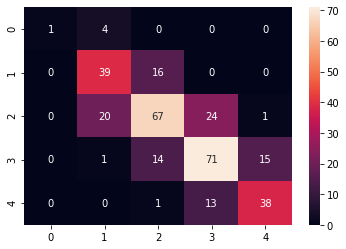

In [14]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, X_pred)

0.6646153846153846

#### XGB CLASSIFIER 

In [16]:
import xgboost as xgb
from xgboost import XGBClassifier

In [17]:
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                            objective = "multi:softmax")

In [18]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}
# subsample: Denotes the subsample ratio of columns for each split, in each level.
# colsample_bytree: Denotes the fraction of columns to be randomly samples for each tree.
# gamma: Gamma specifies the minimum loss reduction required to make a split.
# reg_alpha: Lasso L1 regularization
# reg_lambda: Ridge L2 reguralarization

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

In [20]:
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.716, total=   0.7s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.696, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.682, total=   0.4s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.655, total=   0.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.649, total=   0.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=

[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.689, total=   0.7s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.649, total=   0.7s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.689, total=   0.9s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsampl

[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=0.662, total=   0.9s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=0.655, total=   0.7s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 
[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=0.662, total=   0.7s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytr

[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=0.689, total=   7.4s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=0.635, total=   6.5s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 
[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=0.689, total=   7.7s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


In [21]:
xgb_final = XGBClassifier(random_state=0, 
                          n_estimators=xgb_rscv.best_params_['n_estimators'], 
                          max_depth=xgb_rscv.best_params_['max_depth'],
                          learning_rate=xgb_rscv.best_params_['learning_rate'],
                          gamma=xgb_rscv.best_params_['gamma'],
                          colsample_bytree=xgb_rscv.best_params_['colsample_bytree'],
                          subsample=xgb_rscv.best_params_['subsample'],
                          reg_alpha=xgb_rscv.best_params_['reg_alpha'],
                          reg_lambda=xgb_rscv.best_params_['reg_lambda'],
                          min_child_weight=xgb_rscv.best_params_['min_child_weight'])
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=4.5, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_pred = xgb_final.predict(X_test)

In [23]:
report = classification_report(y_pred,y_test,digits=3)
print(report)

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         0
           1      0.600     0.688     0.641        48
           2      0.723     0.698     0.711       116
           3      0.812     0.678     0.739       121
           4      0.615     0.800     0.696        40

    accuracy                          0.702       325
   macro avg      0.550     0.573     0.557       325
weighted avg      0.725     0.702     0.709       325



C:\Users\Aarsh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

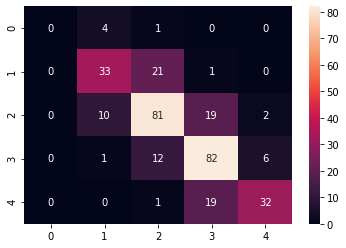

In [25]:
import seaborn as sns
sns.heatmap(cm1, annot=True)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7015384615384616

#### SUPPORT VECTOR CLASSIFIER

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, y_train)

SVC(random_state=0)

In [49]:
Y_Pred = classifier.predict(X_Test)

In [50]:
cm2 = confusion_matrix(y_test, Y_Pred)

<AxesSubplot:>

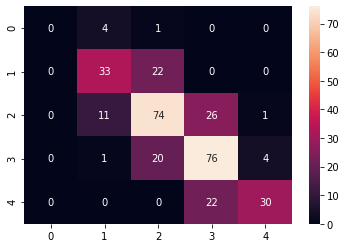

In [51]:
sns.heatmap(cm2, annot=True)

In [52]:
accuracy_score(y_test, Y_Pred)

0.6553846153846153